In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,log_loss,make_scorer
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC 

In [112]:
train=pd.read_csv(r'C:\Users\Rahul\Desktop\MetalFurnace-Participants_Data\Train.csv')
test=pd.read_csv(r'C:\Users\Rahul\Desktop\MetalFurnace-Participants_Data\Test.csv')

In [113]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 29 columns):
f0       620 non-null float64
f1       620 non-null float64
f2       620 non-null float64
f3       620 non-null float64
f4       620 non-null float64
f5       620 non-null float64
f6       620 non-null float64
f7       620 non-null float64
f8       620 non-null float64
f9       620 non-null float64
f10      620 non-null float64
f11      620 non-null float64
f12      620 non-null float64
f13      620 non-null float64
f14      620 non-null float64
f15      620 non-null float64
f16      620 non-null float64
f17      620 non-null float64
f18      620 non-null float64
f19      620 non-null float64
f20      620 non-null float64
f21      620 non-null float64
f22      620 non-null float64
f23      620 non-null float64
f24      620 non-null float64
f25      620 non-null float64
f26      620 non-null float64
f27      620 non-null float64
grade    620 non-null int64
dtypes: float64(28), int64(

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 28 columns):
f0     266 non-null float64
f1     266 non-null float64
f2     266 non-null float64
f3     266 non-null float64
f4     266 non-null float64
f5     266 non-null float64
f6     266 non-null float64
f7     266 non-null float64
f8     266 non-null float64
f9     266 non-null float64
f10    266 non-null float64
f11    266 non-null float64
f12    266 non-null float64
f13    266 non-null float64
f14    266 non-null float64
f15    266 non-null float64
f16    266 non-null float64
f17    266 non-null float64
f18    266 non-null float64
f19    266 non-null float64
f20    266 non-null float64
f21    266 non-null float64
f22    266 non-null float64
f23    266 non-null float64
f24    266 non-null float64
f25    266 non-null float64
f26    266 non-null float64
f27    266 non-null float64
dtypes: float64(28)
memory usage: 58.3 KB


In [116]:
train.isnull().sum()

f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
grade    0
dtype: int64

In [117]:
test.isnull().sum()

f0     0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
f25    0
f26    0
f27    0
dtype: int64

In [118]:
train.index

RangeIndex(start=0, stop=620, step=1)

In [119]:
train.f9.value_counts()

0.0    620
Name: f9, dtype: int64

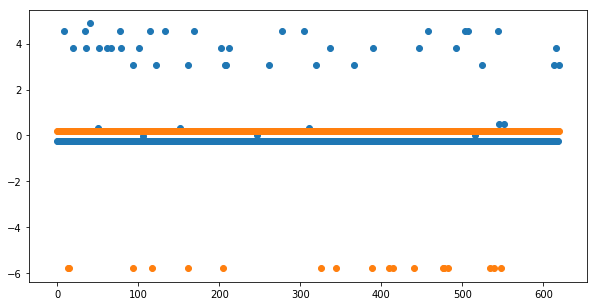

In [120]:
plt.figure(figsize=(10,5))
plt.scatter(train.index,train.f1)
plt.scatter(train.index,train.f14)

In [121]:
label=train.grade

In [122]:
train.drop(columns=['grade'],inplace=True)

In [123]:
label.value_counts()

2    472
1     68
3     47
4     27
0      6
Name: grade, dtype: int64

In [124]:
label = label.astype('int')

In [146]:
sss=StratifiedShuffleSplit(random_state=50,test_size=0.2)
for tr_index, te_index in sss.split(train,label):
    xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
    ytrain, ytest = label[tr_index], label[te_index]
    
    model.

StratifiedShuffleSplit(n_splits=10, random_state=50, test_size=0.2,
            train_size=None)


In [103]:
l=list()
l=[DecisionTreeClassifier(),RandomForestClassifier(),SVC(probability=True)]

In [104]:
def loss(act,predi):
    print (log_loss(act,predi))

In [108]:
label = label.astype('int')

In [110]:
for i in l:
    model = i
    model.fit(xtrain, ytrain)
    result = model.predict_proba(xtest)
    loss(result, ytest)

ValueError: y_true and y_pred contain different number of classes 5, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0 1 2 3 4]